In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# import matplotlib.colors as colors
from math import *
import cmath
from scipy.linalg import expm

# 对角化用 eigenvals, eigenvecs = np.linalg.eig(A) 看一下给出的是两个行向量吗
# Kronecker积用 np.kron()
# math库中的函数直接用
# cmath 包含支持复数的开方、对数运算，还有常数pi, e等
# 还是用np.pi，np.e吧，这样不用额外导入对象
# 使用时用cmath.函数名，例：cmath.exp()，总是返回一个复数
# e的矩阵指数，可以导入expm()后使用

In [4]:
def fibonacci(n):
    if not(type(n) == int) or n < 0:
        return
    if n == 0 or n == 1:
        return 1
    else:
        f = fibonacci(n-1) + fibonacci(n-2)
        return f
# F14 = 610

def Ham_Raman_real(L, tso, Mz, beta, t0=1, phi=1):
    """
    创建实空间哈密顿量
    L 系统尺寸
    t0 自旋不变跃迁强度
    tso 自旋翻转跃迁强度
    Mz 准周期势幅值
    beta 准周期参数，一般取无理数

    编写哈密顿量时c_dagger的指标对应行
    """
    Ham = np.zeros((2 * L, 2 * L))
    for i in range(L - 1):
        Ham[2 * i + 2, 2 * i] = t0  # 0, 2, 4, ... down
        Ham[2 * i + 3, 2 * i + 1] = - t0  # 1, 3, 5, ... up
        Ham[2 * i + 1, 2 * i + 2] = tso
        Ham[2 * i + 3, 2 * i] = - tso
    Ham[0, 2 * (L - 1)] = t0  # PBC条件
    Ham[1, 2 * (L - 1) + 1] = - t0
    Ham[2 * (L - 1) + 1, 0] = tso
    Ham[1, 2 * (L - 1)] = - tso
    Ham += Ham.conj().T  # 加上H.c.
    for i in range(L):  # 准周期势
        Ham[2 * i, 2 * i] = - Mz * cos(2 * np.pi * beta * (i + 1) + phi)  # 下标从0开始，但是格点从1开始，所以i + 1
        Ham[2 * i + 1, 2 * i + 1] = Mz * cos(2 * np.pi * beta * (i + 1) + phi)
    return Ham


In [5]:
L = fibonacci(14)
BETA = fibonacci(13) / fibonacci(14)

TSO_LIST = np.linspace(0, 2, 32)
MZ_LIST = np.linspace(0, 6, 32)


In [6]:
mFD = np.zeros((TSO_LIST.shape[0], MZ_LIST.shape[0]))


In [5]:
# help(plt.pcolormesh)

In [6]:
i = 0
for Mz in MZ_LIST:
    j = 0
    for tso in TSO_LIST:
        Ham = Ham_Raman_real(L, tso, Mz, BETA)
        Energy, VecR = np.linalg.eig(Ham)
        VecR = np.abs(VecR) ** 4
        sIPR = np.sum(VecR, axis=0)
        mIPR = np.sum(sIPR) / (2 * L)
        mFD[i, j] = - log(mIPR) / log(L)
        j += 1
    i += 1


In [10]:
import os
if not os.path.exists('mydata'):
    os.mkdir('mydata')  # 创建文件夹
del os
np.savez('mydata/mean_FD.npz', mFD=mFD)  # .npz是numpy提供的存储数据的文件格式，保存覆盖原文件

In [9]:
with np.load('mydata/mean_FD.npz', 'r') as data:  # 用with ... as ... 打开文件，就不用手动关闭文件了，查阅context manager protocol
    mFD = data['mFD']

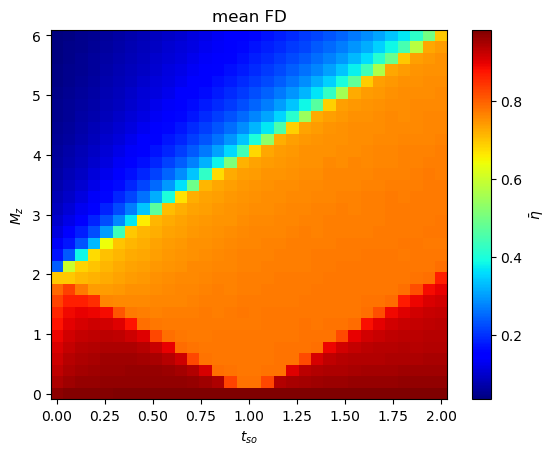

In [13]:
fig, ax = plt.subplots()

cmap = mpl.cm.jet
# norm = mpl.colors.Normalize(vmin=5, vmax=10)
im = ax.pcolormesh(TSO_LIST, MZ_LIST, mFD, cmap=cmap)
ax.set_xlabel("$t_{so}$")  # Add an x-label to the Axes.
ax.set_ylabel("$M_z$")  # Add a y-label to the Axes.
ax.set_title("mean FD")
fig.colorbar(im, ax=ax, label="$\\bar{\\eta}$")
plt.show()